# 细颗粒度量价系列之二——留存筹码比率选股因子

## 2.2 留存筹码比率_因子构建

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS'] # 支持中文
plt.rcParams['axes.unicode_minus'] = False # 负号正常显示

# 添加config路径
sys.path.append(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages')
import config


import pickle
with open('frdata/stock_volume.pkl', 'rb') as f:
    stock_volume = pickle.load(f)
with open('frdata/stock_turnover_f.pkl', 'rb') as f:
    stock_turnover = pickle.load(f)
with open('frdata/stock_amount.pkl', 'rb') as f:
    stock_amount = pickle.load(f)
with open('frdata/stock_close.pkl', 'rb') as f:
    stock_close = pickle.load(f)
with open('frdata/stock_df.pkl', 'rb') as f:
    stock_df = pickle.load(f)
with open('frdata/stock_totalmv.pkl', 'rb') as f:
    stock_totalmv = pickle.load(f)
with open('frdata/stock_freeshare.pkl', 'rb') as f:
    stock_freeshare = pickle.load(f)
    

In [2]:
stock_freeshare

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873726,873806,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,198545.0997,806876.3519,6113.3432,72861.5882,37139.3336,12093.2660,4980.8590,57972.6850,4950.0874,9090.5401,37193.4516,13397.7078,59991.0010,nan,3463.2376,7332.1206,6464.9249,36768.7209,9397.8261,6186.0623,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-06,198545.0997,806876.3519,6113.3432,72861.5882,37139.3336,12093.2660,4980.8590,57972.6850,4950.0874,9090.5401,37193.4516,13397.7078,59991.0010,nan,3463.2376,7332.1206,6464.9249,36768.7209,9397.8261,6186.0623,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-07,198545.0997,806876.3519,6113.3432,72861.5882,37139.3336,12093.2660,4980.8590,57972.6850,4950.0874,9090.5401,37193.4516,13397.7078,59991.0010,nan,3463.2376,7332.1206,6464.9249,36768.7209,9397.8261,6186.0623,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-08,198545.0997,806876.3519,6113.3432,72861.5882,37139.3336,12093.2660,4980.8590,57972.6850,4950.0874,9090.5401,37193.4516,13397.7078,59991.0010,nan,3463.2376,7332.1206,6464.9249,36768.7209,9397.8261,6186.0623,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-09,198545.0997,806876.3519,6113.3432,72861.5882,37139.3336,12093.2660,4980.8590,57972.6850,4950.0874,9090.5401,37193.4516,13397.7078,59991.0010,nan,3463.2376,7332.1206,6464.9249,36768.7209,9397.8261,6186.0623,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,860093.1126,647412.5074,10208.1245,nan,85059.9248,21275.2160,162360.5909,166387.8284,47375.6697,18702.6342,149288.0453,15971.0154,107284.6868,23947.6218,nan,27071.6427,6187.5497,102186.4936,nan,nan,...,2326.1756,9768.3387,2707.9562,575.0000,2851.1809,2635.9121,4306.6700,3179.3334,6390.1274,1203.1608,3243.2415,1995.0000,3297.0398,3913.4433,1210.5745,2328.7750,3688.8500,2612.5000,1775.2300,2070.0000
2025-04-10,860093.1126,647412.5074,10208.1245,nan,85059.9248,21275.2160,162360.5909,166387.8284,47375.6697,18702.6342,149288.0453,15971.0154,107284.6868,23947.6218,nan,27071.6427,6187.5497,102186.4936,nan,nan,...,2326.1756,9768.3387,2707.9562,575.0000,2851.1809,2635.9121,4306.6700,3179.3334,6390.1274,1203.1608,3243.2415,1995.0000,3297.0398,3913.4433,1210.5745,2328.7750,3688.8500,2612.5000,1775.2300,2070.0000
2025-04-11,860093.1126,647412.5074,10208.1245,nan,85059.9248,21275.2160,162360.5909,166387.8284,47375.6697,18702.6342,149288.0453,15971.0154,107284.6868,23947.6218,nan,27071.6427,6187.5497,102186.4936,nan,nan,...,2326.1756,9768.3387,2707.9562,575.0000,2851.1809,2635.9121,4306.6700,3179.3334,6390.1274,1203.1608,3243.2415,1995.0000,3297.0398,3913.4433,1210.5745,2328.7750,3688.8500,2612.5000,1775.2300,2070.0000


In [3]:
df = pd.read_feather(
    r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\L1_01\2024-09-11.feather'
)
#pd.set_option('display.max_rows',None)
#pd.reset_option('display.max_rows')
print(df.head(1000))

       time  stock_code   open   high    low  close   volume        amount
0     93000           1 9.8800 9.8800 9.8600 9.8600   238800  2358816.0000
1     93100           1 9.8600 9.8700 9.8300 9.8400  1136100 11192628.0000
2     93200           1 9.8300 9.8600 9.8300 9.8600   362500  3567821.0000
3     93300           1 9.8500 9.8600 9.8300 9.8400   833200  8200118.0000
4     93400           1 9.8400 9.8400 9.8200 9.8300   703244  6911987.0800
..      ...         ...    ...    ...    ...    ...      ...           ...
995  100100           7 4.7400 4.7400 4.7300 4.7400     3200    15145.0000
996  100200           7 4.7400 4.7400 4.7400 4.7400      100      474.0000
997  100300           7 4.7300 4.7300 4.7300 4.7300    18500    87505.0000
998  100400           7 4.7300 4.7300 4.7200 4.7200    54800   258658.0000
999  100500           7 4.7100 4.7100 4.7100 4.7100     8700    40977.0000

[1000 rows x 8 columns]


In [8]:
import glob
import os
from tqdm import tqdm  # 进度条

data_dir = r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\L1_01'
all_files = sorted(glob.glob(os.path.join(data_dir, '*.feather')))
intervals = []
for hour in [9, 10, 11, 12, 13, 14, 15]:
    for minute in [0, 15, 30, 45]:
        if hour == 9 and minute < 45:
            continue
        if hour == 15 and minute > 0:
            continue
        time_code = hour * 10000 + minute * 100
        intervals.append(time_code)
result_list = []

for file in tqdm(all_files, desc="Processing files"):
    date_str = os.path.basename(file).split('.')[0]
    df = pd.read_feather(file)
    df['date'] = pd.to_datetime(date_str)
    df['minute'] = df['time'] // 100
    df['stock_code'] = df['stock_code'].astype(str).str.zfill(6)
    free_share_dict = stock_freeshare.loc[date_str].to_dict()
    df['free_shares'] = df['stock_code'].map(free_share_dict)
    df['turnover_rate'] = df['volume'] / (df['free_shares'] * 10000)
    df['turnover_15min_sum'] = df.groupby('stock_code')['turnover_rate'].rolling(window=15, min_periods=1).sum().values
    df['amount_15min_sum'] = df.groupby('stock_code')['amount'].rolling(window=15, min_periods=1).sum().values
    df = df[df['time'].isin(intervals)]
    result_list.append(df)
# 合并所有天的结果
all_daily_follow = pd.concat(result_list, ignore_index=True)
print(all_daily_follow)

Processing files: 100%|██████████| 120/120 [10:26<00:00,  5.22s/it]


           time stock_code    open    high     low   close  volume  \
0         94500     000001  9.8500  9.8600  9.8500  9.8500  255100   
1        100000     000001  9.8500  9.8500  9.8400  9.8400  144400   
2        101500     000001  9.8200  9.8300  9.8200  9.8300  408700   
3        103000     000001  9.8300  9.8300  9.8200  9.8200   93400   
4        104500     000001  9.8300  9.8400  9.8300  9.8400   83000   
...         ...        ...     ...     ...     ...     ...     ...   
9824123  140000     689009 63.7000 63.7500 63.7000 63.7500    5350   
9824124  141500     689009 63.9300 63.9400 63.9200 63.9300    7070   
9824125  143000     689009 63.8400 63.9100 63.8400 63.9000   19694   
9824126  144500     689009 63.9300 63.9600 63.9300 63.9300   26848   
9824127  150000     689009 64.0000 64.0000 64.0000 64.0000  112825   

              amount       date  minute  free_shares  turnover_rate  \
0       2513063.0000 2024-09-11     945  816049.8090         0.0000   
1       1421236.0

In [15]:
#all_daily_follow.to_pickle('all_daily_follow.pkl')

In [16]:
all_daily_follow = pd.read_pickle('all_daily_follow.pkl')

In [9]:
# 生成一个新的index列，格式为"2024-09-11_094500"这样
all_daily_follow['datetime'] = all_daily_follow['date'].astype(str) + '_' + all_daily_follow['time'].astype(str).str.zfill(6)

# 第一张表：换手率
stock_turnover = all_daily_follow.pivot(index='datetime', columns='stock_code', values='turnover_15min_sum')

# 第二张表：成交金额
stock_amount = all_daily_follow.pivot(index='datetime', columns='stock_code', values='amount_15min_sum')
print(stock_turnover)
print(stock_amount)

stock_code         000001  000002  000004  000006  000007  000008  000009  \
datetime                                                                    
2024-09-11_094500  0.0009  0.0013  0.0488  0.0039  0.0010  0.0151  0.0009   
2024-09-11_100000  0.0005  0.0007  0.0198  0.0015  0.0004  0.0034  0.0012   
2024-09-11_101500  0.0007  0.0008  0.0087  0.0013  0.0007  0.0020  0.0013   
2024-09-11_103000  0.0004  0.0011  0.0041  0.0018  0.0007  0.0007  0.0005   
2024-09-11_104500  0.0003  0.0008  0.0045  0.0010  0.0005  0.0016  0.0003   
...                   ...     ...     ...     ...     ...     ...     ...   
2025-03-17_140000  0.0016  0.0005  0.0015  0.0031  0.0009  0.0010  0.0002   
2025-03-17_141500  0.0021  0.0004  0.0016  0.0008  0.0008  0.0005  0.0005   
2025-03-17_143000  0.0011  0.0006  0.0016  0.0006  0.0004  0.0008  0.0001   
2025-03-17_144500  0.0020  0.0006  0.0044  0.0017  0.0006  0.0009  0.0006   
2025-03-17_150000  0.0031  0.0010  0.0074  0.0020  0.0019  0.0029  0.0011   

In [10]:
window = 16*20
survival_rate = 1 - stock_turnover 
holding_ret = pd.DataFrame(index=stock_turnover.index, columns=stock_turnover.columns)

for stock in stock_turnover.columns:
    print(f"Processing {stock}...")
    amount_vals = stock_amount[stock].values
    survival_vals = survival_rate[stock].values
    # 先计算累乘数组
    cum_survival = np.ones_like(survival_vals)
    cum_survival[1:] = np.cumprod(survival_vals[1:])
    result = np.full(len(stock_amount), np.nan)
    for t in range(window-1, len(amount_vals)):
        idx = np.arange(t-window+1, t+1)
        # 留存率 = cum_survival[t] / cum_survival[idx]
        # 对于最后一天（i==window-1），留存率为1
        survival_factors = cum_survival[t] / cum_survival[idx]
        survival_factors[-1] = 1.0  # 最后一天留存率为1
        rsd_volume = amount_vals[idx] * survival_factors
        total_rsd = np.sum(rsd_volume)
        total_amount = np.sum(amount_vals[idx])
        if total_amount > 0:
            result[t] = total_rsd / total_amount
    holding_ret[stock] = result


Processing 000001...
Processing 000002...
Processing 000004...
Processing 000006...
Processing 000007...
Processing 000008...
Processing 000009...
Processing 000010...
Processing 000011...
Processing 000012...
Processing 000014...
Processing 000016...
Processing 000017...
Processing 000019...
Processing 000020...
Processing 000021...
Processing 000025...
Processing 000026...
Processing 000027...
Processing 000028...
Processing 000029...
Processing 000030...
Processing 000031...
Processing 000032...
Processing 000034...
Processing 000035...
Processing 000036...
Processing 000037...
Processing 000039...
Processing 000040...
Processing 000042...
Processing 000045...
Processing 000048...
Processing 000049...
Processing 000050...
Processing 000055...
Processing 000056...
Processing 000058...
Processing 000059...
Processing 000060...
Processing 000061...
Processing 000062...
Processing 000063...
Processing 000065...
Processing 000066...
Processing 000068...
Processing 000069...
Processing 00

In [17]:
#holding_ret.to_pickle('holding_ret2.pkl')

In [18]:
holding_ret = pd.read_pickle('holding_ret2.pkl')

In [19]:
holding_ret

stock_code,000001,000002,000004,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000019,000020,000021,000025,000026,000027,000028,...,688758,688766,688767,688768,688772,688776,688777,688778,688779,688786,688787,688788,688789,688793,688798,688799,688800,688819,688981,689009
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-09-11_094500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024-09-11_100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024-09-11_101500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024-09-11_103000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024-09-11_104500,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-17_140000,0.8730,0.7847,0.4758,0.6770,0.8118,0.6117,0.8633,0.6320,0.7837,0.9186,0.6469,nan,0.5113,0.8116,0.7014,0.5277,0.7531,0.6763,0.9009,0.8145,...,nan,0.4278,0.8069,0.7123,0.8361,0.4977,0.6988,0.6472,0.7984,0.7193,0.4593,0.5034,0.7766,0.4562,0.6800,0.7780,0.4110,0.6704,0.7430,0.8241
2025-03-17_141500,0.8732,0.7848,0.4761,0.6774,0.8119,0.6119,0.8634,0.6318,0.7837,0.9185,0.6469,nan,0.5106,0.8119,0.7018,0.5280,0.7531,0.6761,0.9010,0.8145,...,nan,0.4279,0.8068,0.7129,0.8361,0.4980,0.6989,0.6473,0.7983,0.7193,0.4591,0.5028,0.7765,0.4563,0.6801,0.7778,0.4107,0.6704,0.7430,0.8242
2025-03-17_143000,0.8730,0.7848,0.4763,0.6775,0.8120,0.6122,0.8635,0.6313,0.7842,0.9186,0.6468,nan,0.5102,0.8119,0.7021,0.5279,0.7531,0.6756,0.9009,0.8145,...,nan,0.4280,0.8067,0.7134,0.8361,0.4979,0.6993,0.6477,0.7981,0.7192,0.4592,0.5018,0.7763,0.4566,0.6803,0.7773,0.4107,0.6704,0.7430,0.8246


In [12]:
# 筛选15:00:00的数据并修改索引
daily_holding_ret = holding_ret[holding_ret.index.str.endswith('_150000')].copy()
# 将索引从'2024-09-11_150000'格式转换为'2024-09-11'格式
daily_holding_ret.index = daily_holding_ret.index.str.split('_').str[0]
# 将索引转换为datetime格式
#daily_holding_ret.index = pd.to_datetime(daily_holding_ret.index)

# 按日期排序
daily_holding_ret = daily_holding_ret.sort_index()

print(daily_holding_ret) 

stock_code  000001  000002  000004  000006  000007  000008  000009  000010  \
datetime                                                                     
2024-09-11     nan     nan     nan     nan     nan     nan     nan     nan   
2024-09-12     nan     nan     nan     nan     nan     nan     nan     nan   
2024-09-13     nan     nan     nan     nan     nan     nan     nan     nan   
2024-09-18     nan     nan     nan     nan     nan     nan     nan     nan   
2024-09-19     nan     nan     nan     nan     nan     nan     nan     nan   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2025-03-11  0.8904  0.7336  0.4272  0.6674  0.8194  0.6142  0.8377  0.6479   
2025-03-12  0.8862  0.7487  0.4489  0.6674  0.8212  0.6109  0.8467  0.6399   
2025-03-13  0.8866  0.7743  0.4634  0.6737  0.8175  0.6083  0.8555  0.6397   
2025-03-14  0.8831  0.7805  0.4731  0.6747  0.8138  0.6076  0.8605  0.6409   
2025-03-17  0.8721  0.7858  0.4771  0.6778  0.8120  0.6127  0.86

In [22]:
daily_holding_ret2 = daily_holding_ret.dropna(how='all')

load data locally from 2009-01-05 to 2025-04-15
多头超额:
             2024    2025   mean
年化超额   0.2199 -0.1290 0.0454
波动率     0.1166  0.1124 0.1145
最大回撤   0.0346  0.0697 0.0697
夏普率     1.8850 -1.1478 0.3969
收益回撤比 6.3515 -1.8511 0.6523
半波       0.0248  0.0297 0.0273
半夏普     8.8660 -4.3355 1.6664


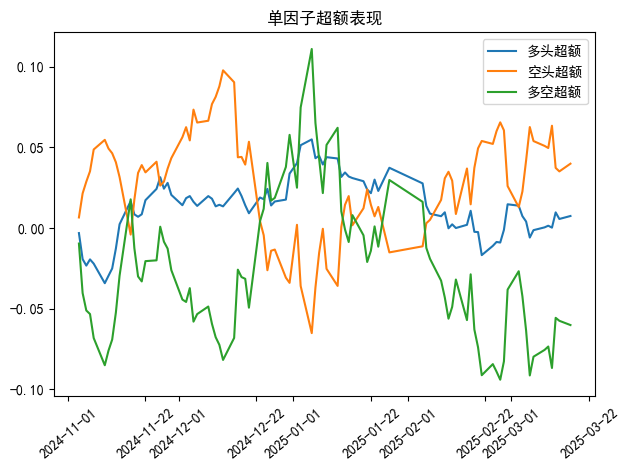

平均单边换手：0.106
年化交易成本:0.003 (未在超额中扣除)


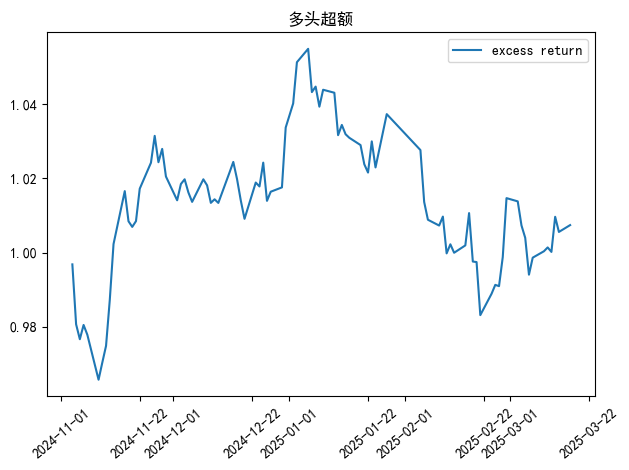

Rank IC: -0.20%
Rank ICIR: -0.01
t值: -0.03
年化收益率: 4.54%
年化波动率: 11.45%
信息比率: 0.40
最大回撤: 6.97%


In [23]:
res=config.backtest_stand(daily_holding_ret2,top=300,fre='week',stock_pool='888888')
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# t值
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")